<a href="https://colab.research.google.com/github/lompas10/DS-Tinkoff-Challenge-2k17/blob/main/1/stats_PR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5, 5)

In [2]:
data = pd.read_csv('/content/Мат.Статистика - Лист1.csv')

In [3]:
data.head()

,id,Name,height,random_number,month_of_birth,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,Базанова Дарья Владимировна,162.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Байгускаров Данияр Шакирьянович,180.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Балобин Дмитрий Юрьевич,169.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Борисов Алексей Михайлович,180.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Брэдеску Мария Романовна,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data.iloc[:, 0:5]

In [5]:
data = data.dropna(0)

In [6]:
data

,id,Name,height,random_number,month_of_birth
0,1,Базанова Дарья Владимировна,162.0,2.0,1.0
1,2,Байгускаров Данияр Шакирьянович,180.0,4.0,2.0
2,3,Балобин Дмитрий Юрьевич,169.0,7.0,3.0
3,4,Борисов Алексей Михайлович,180.0,3.0,2.0
5,6,Власов Виктор Сергеевич,183.0,4.0,8.0
6,7,Денисова Виктория Михайловна,166.0,7.0,5.0
7,8,Жаров Всеволод Валерьевич,178.0,3.0,2.0
8,9,Котельник Вячеслав Евгеньевич,180.0,5.0,7.0
10,11,Ломовцев Павел Павлович,180.0,5.0,10.0
11,12,Любимов Андрей Игоревич,174.0,4.0,12.0


In [7]:
var_range_number = pd.DataFrame({'count' : data.random_number.value_counts()}).reset_index()
var_range_month = pd.DataFrame({'count' : data.month_of_birth.value_counts()}).reset_index()

In [8]:
var_range_number = var_range_number.sort_values('index').astype('int64')
var_range_month = var_range_month.sort_values('index').astype('int64')

In [9]:
var_range_number.T

,4,2,1,3,0
index,2,3,4,5,7
count,2,4,5,3,5


In [10]:
var_range_month.T

,1,0,9,6,8,7,5,2,4,3
index,1,2,3,4,5,7,8,9,10,12
count,3,4,1,1,1,1,2,2,2,2


In [11]:
def relative_freq(column):
  return column / sum(column)

In [12]:
freq_number = pd.DataFrame({'Число' : var_range_number['index'].astype('int64'),
                     'Относительная частота' : relative_freq(var_range_number['count']).values})
freq_number

,Число,Относительная частота
4,2,0.105263
2,3,0.210526
1,4,0.263158
3,5,0.157895
0,7,0.263158


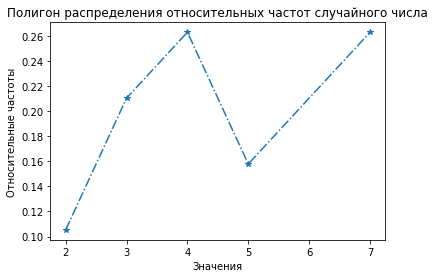

In [14]:
plt.xlabel('Значения')
plt.ylabel('Относительные частоты')
plt.title('Полигон распределения относительных частот случайного числа')
plt.plot(freq_number['Число'], freq_number['Относительная частота'], '-.*');

In [15]:
freq_month = pd.DataFrame({'value' : var_range_month['index'],
                     'freq_month' : relative_freq(var_range_month['count']).values})

In [16]:
freq_month

,value,freq_month
1,1,0.157895
0,2,0.210526
9,3,0.052632
6,4,0.052632
8,5,0.052632
7,7,0.052632
5,8,0.105263
2,9,0.105263
4,10,0.105263
3,12,0.105263


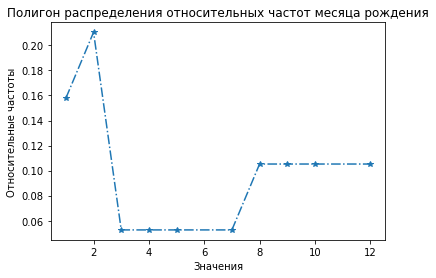

In [17]:
plt.xlabel('Значения')
plt.ylabel('Относительные частоты')
plt.title('Полигон распределения относительных частот месяца рождения')
plt.plot(freq_month['value'], freq_month.freq_month, '-.*');

In [18]:
def distrib(column):
  return np.array(np.cumsum(column))

In [20]:
freq_number = distrib(freq_number['Относительная частота'])
freq_month = distrib(freq_month.freq_month)

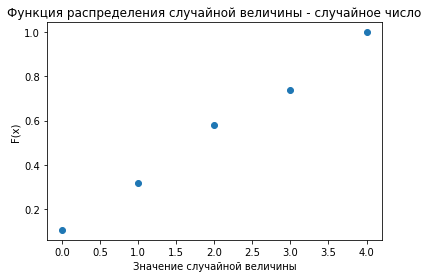

In [21]:
plt.xlabel('Значение случайной величины')
plt.ylabel('F(x)')
plt.title('Функция распределения случайной величины - случайное число')
plt.plot(freq_number, 'o');

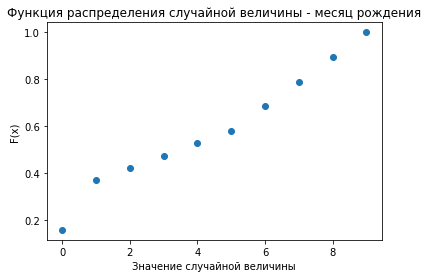

In [22]:
plt.xlabel('Значение случайной величины')
plt.ylabel('F(x)')
plt.title('Функция распределения случайной величины - месяц рождения')
plt.plot(freq_month, 'o');

In [23]:
stats = pd.DataFrame({'Среднее' : [np.mean(data.random_number), np.mean(data.month_of_birth)],
                      'Дисперсия' : [np.var(data.random_number), np.var(data.month_of_birth)],
                     'Ст.отклонение' : [np.std(data.random_number), np.std(data.month_of_birth)],
                      'Относ. вариация' : [np.std(data.random_number) / np.mean(data.random_number) * 100, np.std(data.month_of_birth) / np.mean(data.month_of_birth) * 100]}, index=['Сл.число', 'Месяц рождения'])

In [24]:
stats.head()

,Среднее,Дисперсия,Ст.отклонение,Относ. вариация
Сл.число,4.526316,2.880886,1.697317,37.498873
Месяц рождения,5.684211,14.847645,3.853264,67.788908
